## Essay Answers

#### Q1. Briefly describe your methodology for analyzing the data.

My method of analysis can be broken into three parts:
1. Dataset Description Overview 
    - Thoroughly reading over the instructions and what the data is composed of, which are the predictive features and target feature/s. 
    - Opened the train.csv and test.csv to make sure all of the features described exist.
2. Data Exploration
    - Loading the train data as a DataFrame to check the initial feature overview (e.g. shape, columns, dtypes).
    - Checked for duplicates in order to avoid data leakage before the modelling.
    - Checked for missing values and investigated on the specific entries.
        > Majority of the missing values in the dataset comes from four rows (row 2360 is completely empty, rows 3303 and 4189 all have missing weight and target feature values, and row 4876 have missing height value and the three target values).
3. Data Preparation
    - Dropped duplicates, and decided to drop the missing values which only accounts for 7.8% of the dataset so removing these null values does not significantly affect the train dataset distribution (statistical analysis provided in the data_preparation notebook). 
    - Before exporting as a new csv file, I also check if there was only one object column (gender).

#### Q2. Which ML algorithm did you pick for making predictions? Why? Which ML algorithm would be a poor choice for this dataset? Why?

I chose the **RandomForestRegressor** as my model for my pipeline after a thorough and exhaustive experiment on four regressors, specifically between: 
- DecisionTreeRegressor() 
- RandomForestRegressor()
- MultiOutputRegressor(estimator=SGDRegressor())
- KNeighborsRegressor()

All of the models were subjected to hyperparameter tuning, performance evaluation (metric and learning curve), and predictive accuracy (residuals). I found that the RandomForestRegressor had a high performance metric score on "r2" (training score ≈ 0.92, test score ≈ 0.86) and had the least dispersed residuals when I plotted the predictions versus the actual values by using a validation set from the preprocessed train data. Despite the test score plateauing, the chances of overfitting when trained on a new dataset is comparatively lower than the other regressors which would give the model consistency over its predictions.

Any Classification model would not work on this dataset. However not all regressors can handle a multi-output regression task unless it is wraped within a MultiOutputRegressor(). Simple LinearRegressor would work poorly on this dataset, so as SDGRegressor. KNeighborsRegressor also performed poorly during the training because there is no explicit parameters for regularization unlike decision trees and random forest.

#### Q3. Which evaluation metric did you pick? Why? What evaluation metric would you use if this was a classification problem to predict whether a person was male or female? How would your answer change if the classes were very imbalanced?

I experimented between MSE, RMSE, and R2 and found that R2 was the better metric to use as an evaluation of the overall goodness of fit for the data and the model. MSE was not applicable for a multi-output regression task and RMSE was not really a good metric to check the overall performance. 

I would choose precision metric for a classification task when predicting if the person is male or female in order to be confident that the model predicted the right class. In case of an imbalanced classes, I would use roc-auc score to determine how well the model is able to identify between the two classes across all thresholds. 

#### Q4. The body measurement prediction problem is a regression problem. In a classification problem which would worry you more: false positives or false negatives? Why?

I would worry about having a significant number of false positives since it is typically an incorrect prediction. In the context of body measurement prediction, in line with the company's main service, false positives would lead to losing buyer trust, negatively affecting company branding, and potential decrease in profits due to products recalls and/or return and exchange costs. 

#### Q5. How would you deal with missing data for numerical and categorical variables?

Pior to imputing the missing values, checking the percentage of the missing data should be prioritized first to decide whether to drop the feature/s or row/s, or impute the missing data. 
- for numerical data: 
    - If the data has outliers, impute using a SimpleImputer with the strategy set to median (robust to outliers).
    - If there are no outliers or just a small number, impute using a SimpleImputer with the strategy set to mean.
    - However, if the data is a time series or basically the order of the values affects the next or previous values, a KNNImputer should be used to find the nearest value between the data points. 
- for categorical data:
    - The safest way to impute a missing categorical data is by using a SimpleImputer with the strategy set to most frequent.
    - However, if the missing data is dependent on another feature, mapping can also be used or fill_na() function. 
    - Some datasets also have an "NA" value so this should not be considered as null but a class instead.

#### Q6. Explain regularization to a layperson. What is it and why would you want to use it?

Regularization is basically a constraint or a limit to help improve an outcome. In machine learning, try to imagine an algorithm as your bank account or wallet. When you take out too much cash, you won't have enough money to sustain your living expenses for maybe a week or a month. So in this case, you would try to have a weekly budget limit or a penalty if you buy something unnecessary.

In a parallel yet contrasting idea, when we put too many things into a machine learning model, it gets too complicated and doesn't work as well. Regularization helps by making sure the model isn't too complicated, which makes it better at giving accurate predictions.

#### Q7. What’s the difference between L1 and L2 regularization methods?

L1 regularization or Lasso penalizes less important coefficients by shrinking them to zero  and is commonly used as a feature selector by eliminating irrelivant features. 

L2 regularization or Ridge is used in a context where all of the coefficient may have an impact on the model's performance. It adds a proportional penalty to the square of the coefficients, penalizing large coefficients but does not usually reduce them all the way to zero resulting to a lower influence.

#### Q8. What is better: 50 small decision trees or one large decision tree? Why?

It is better to use 50 small decision trees than one large decsion tree because of the nature of decision trees having high variance which is prone to overfitting. A tree ensemble or forest (such as Random Forest) would be better at generalizing since they are less likely to capture noise in the data, they are nire robust than one large decision tree. In addition, forests also asses feature importance to identify the most influential feature for prediction.

**Decision Tree Residuals**

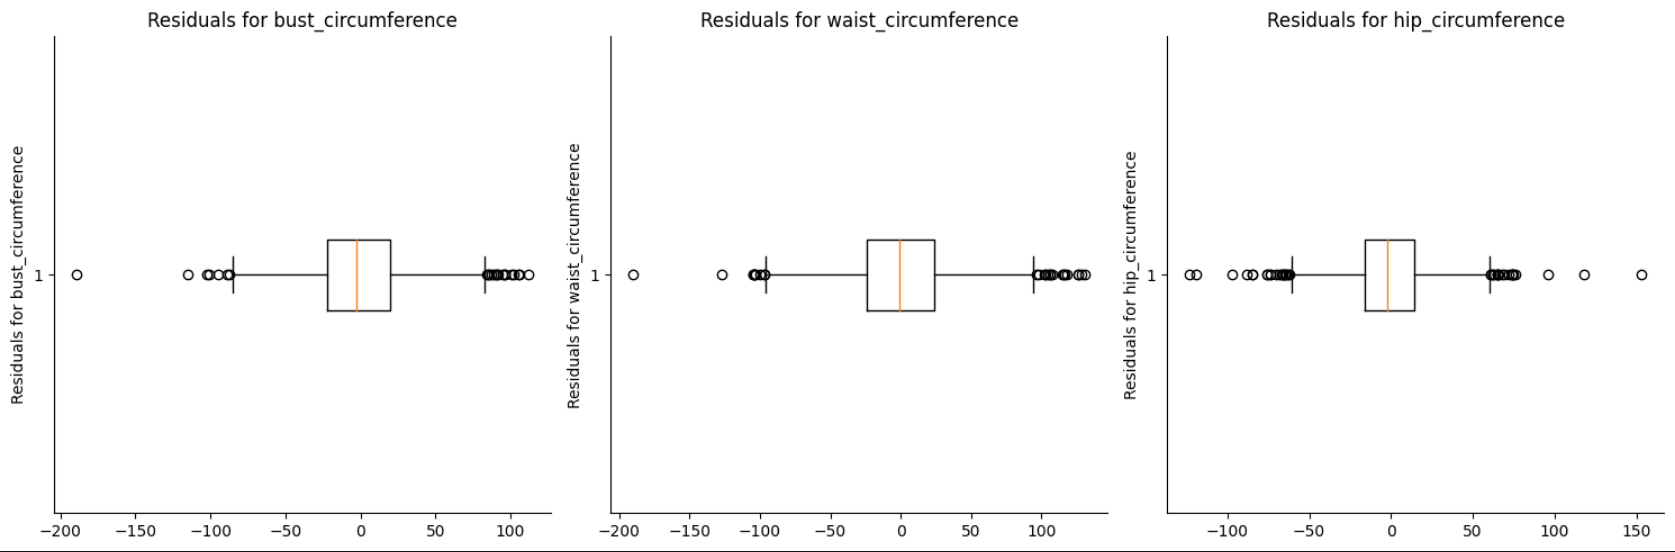

**Random Forest Residuals**

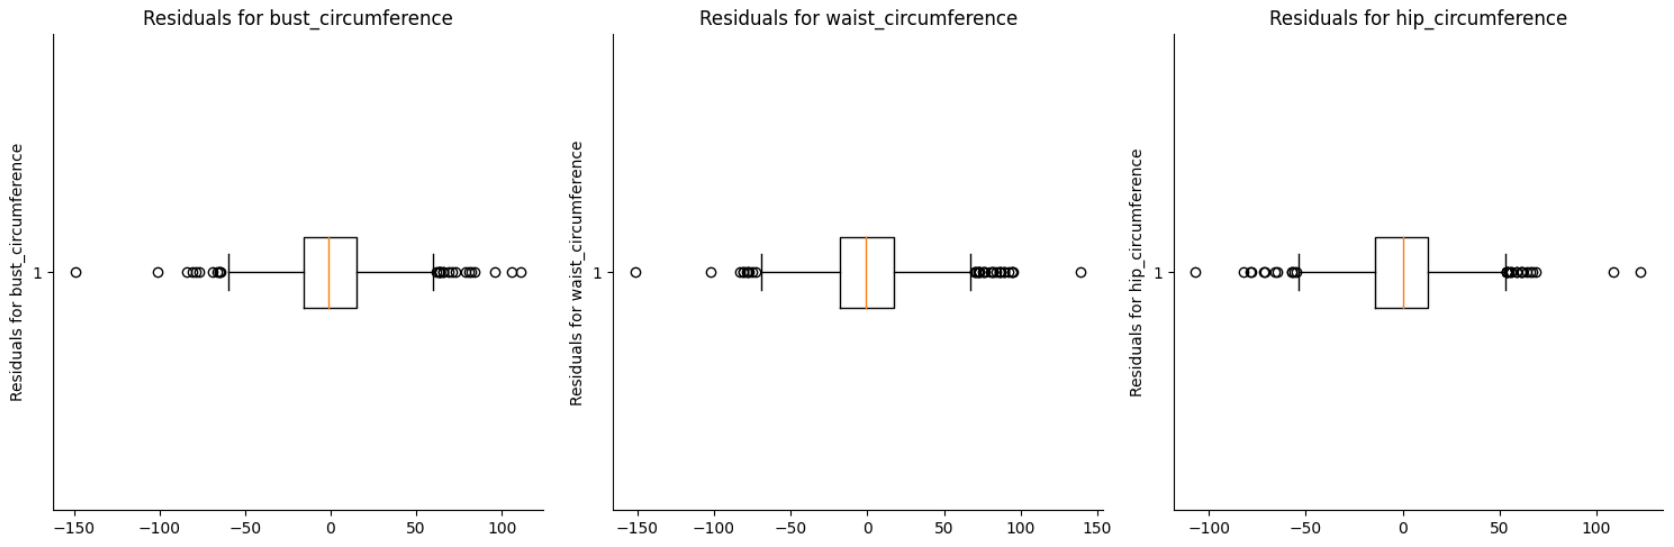